# Neural Networks

This is a simple image recognition model using tensorflow through keras, on the built in dataset: fashion_mnist

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset and assign it to variables
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0,23,23]

194

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
# Make sure the names of the classes are in the correct order, or else they will not match the correct labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

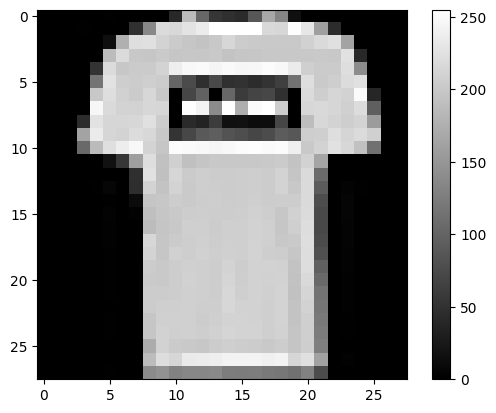

In [8]:
plt.figure()
plt.imshow(train_images[1], cmap='gray')
plt.colorbar()
plt.show()

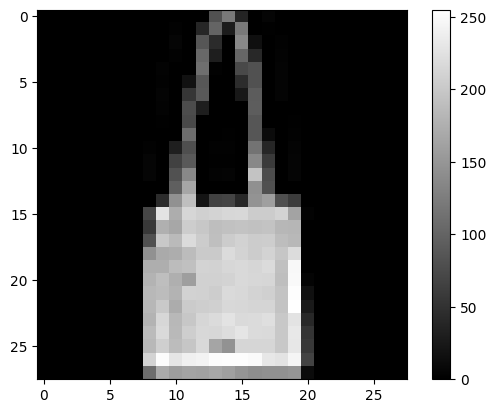

In [9]:
plt.figure()
plt.imshow(train_images[200], cmap='gray')
plt.colorbar()
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

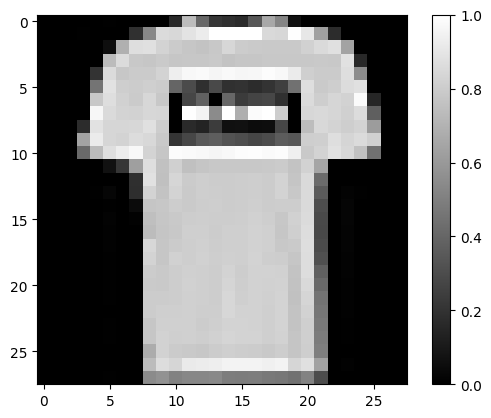

In [11]:
plt.figure()
plt.imshow(train_images[1], cmap='gray')
plt.colorbar()
plt.show()

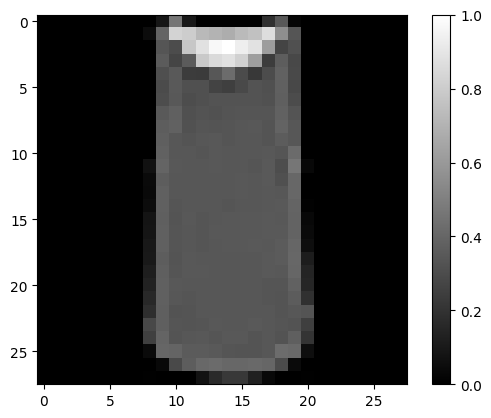

In [12]:
plt.figure()
plt.imshow(train_images[2], cmap='gray')
plt.colorbar()
plt.show()

In [13]:
class_names[train_labels[2]]

'T-shirt/top'

In [14]:
# Building our model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3098 - accuracy: 0.8858


In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - 0s 998us/step - loss: 0.3538 - accuracy: 0.8738


In [25]:
test_images.shape

(10000, 28, 28)

In [26]:
test_images[0].shape

(28, 28)

In [41]:
im_num = 5
prediction = model.predict(test_images[im_num].reshape(1, 28, 28))

1/1 [==============================] - 0s 16ms/step


In [42]:
print(prediction)

[[1.8760734e-04 9.9977130e-01 1.8381731e-06 2.7988823e-05 6.4787241e-06
  5.6332916e-10 4.7506701e-06 2.7302436e-15 2.4204027e-08 6.7402597e-11]]


As we can see above the model is quite sure about which of the 10 alternatives this is, let's see if it is correct.

In [43]:
class_names[np.argmax(prediction)]

'Trouser'

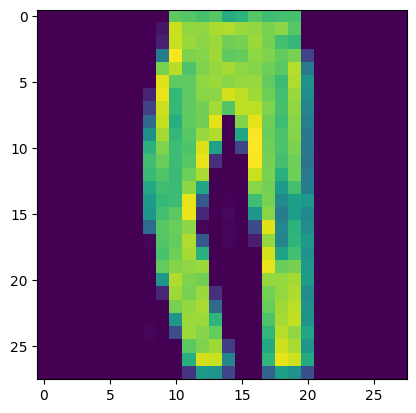

In [44]:
plt.figure()
plt.imshow(test_images[im_num])

It's correct! If you want to test out some of the other predictions, you are free to do so. Maybe try to find the accuracy or the F1-Score.